In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

class PCA():
    def __init__(self,n_components):
        self.n_components=n_components
        self.VT=None
        self.mean_val=None
        
    def Centralization(self,data):
        n,m=data.shape
        mean_val = np.mean(data, axis=0)  # 按列求均值，即求各个特征的均值
        new_data = data-mean_val
        return new_data, mean_val

    def fit(self,data):
        new_data,mean_val=self.Centralization(data)
        self.mean_val=mean_val
        U,sigma,VT=np.linalg.svd(new_data)
        self.VT=VT
        
    def transform(self,data):
        V_new=self.VT[:self.n_components,:]
        return np.dot(data,V_new.T)
    
    def fit_transform(self,data):
        self.fit(data)
        return self.transform(data)
    def restructure(self,data):
        X_low=self.fit_transform(data)
        return np.dot(X_low,self.VT[:self.n_components,:])+self.mean_val

============================PCA对图像降维及重构============================


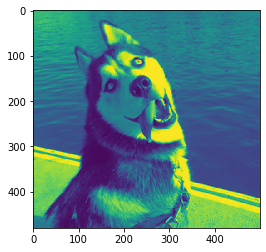

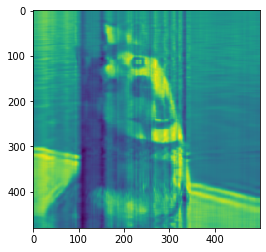

In [98]:
print('============================PCA对图像降维及重构============================')
X=cv2.imread('E:/2.jpg',cv2.IMREAD_GRAYSCALE)
model=PCA(n_components=20)
X_new=model.restructure(X)
plt.imshow(X)
plt.show()
plt.imshow(X_new)
plt.show()